In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
adults = pd.read_csv('adult.data', sep=', ', engine='python')
adults.columns = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status', 'occupation',
         'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', '>50K, <=50K']
adults.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K"
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### 1. How many males and females?

In [3]:
adults.sex.value_counts()

Male      21789
Female    10771
Name: sex, dtype: int64

### 2. What is the mean male age?

In [4]:
adults[adults['sex'] == 'Male']['age'].mean()

39.433567396392675

### 3. What is the proportion of the US citizens?

In [5]:
adults[adults['native-country'] == 'United-States'].shape[0]/adults.shape[0]

0.8958538083538083

### 4. Plot the distribution of people’s education as a bar plot.

<BarContainer object of 16 artists>

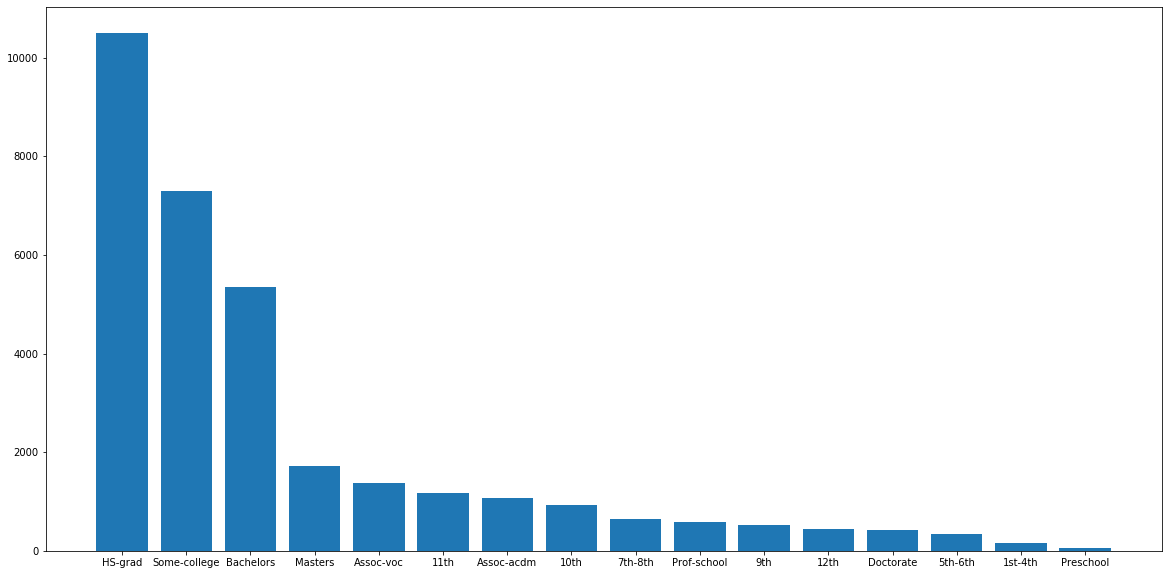

In [6]:
plt.figure(figsize=(20, 10))
plt.bar(adults.education.value_counts().index, adults.education.value_counts().values)

### 5. What is the mean and standard deviation of the ”final weight” for divorced people?

In [7]:
print('mean = ', adults[adults['marital-status']=='Divorced']['fnlwgt'].mean())
print('std = ', adults[adults['marital-status']=='Divorced']['fnlwgt'].std())

mean =  185802.79045689848
std =  105646.78945933603


In [8]:
adults[adults['marital-status']=='Divorced']['fnlwgt'].describe().loc[['mean', 'std']]

mean    185802.790457
std     105646.789459
Name: fnlwgt, dtype: float64

### 6. Is it true that the people who receive over 50k are mostly highly educated?

In [9]:
adults[adults['>50K, <=50K'] == '>50K']['education'].value_counts()
# yes, it is true

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

### 7. What is the maximum male and female age for each race?

In [10]:
adults.groupby(['race', 'sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### 8. The people from which countries work as farmers/fishers?

In [11]:
adults[adults['occupation'] == 'Farming-fishing']['native-country'].value_counts()

United-States    879
Mexico            77
Puerto-Rico        5
?                  5
Philippines        4
Guatemala          4
Cuba               2
Vietnam            2
Italy              2
Canada             2
El-Salvador        2
France             1
Ireland            1
Yugoslavia         1
Hong               1
Portugal           1
England            1
Poland             1
Japan              1
Germany            1
Cambodia           1
Name: native-country, dtype: int64

### 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [12]:
adults[(adults.education == 'Bachelors') & (adults.sex == 'Male')].shape[0]/adults[(adults.education == 'Masters') & (adults.sex == 'Male')].shape[0]

3.146588037068239

In [13]:
adults[(adults.education == 'Bachelors') & (adults.sex == 'Female')].shape[0]/adults[(adults.education == 'Masters') & (adults.sex == 'Female')].shape[0]

3.0205223880597014

### 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [14]:
max_hours = adults['hours-per-week'].max()
print(max_hours)

99


In [15]:
len(adults[adults['hours-per-week'] == max_hours])

85

In [16]:
adults[adults['hours-per-week'] == max_hours]['>50K, <=50K']

934       >50K
1171      >50K
1886      >50K
3577      >50K
4085     <=50K
4307     <=50K
4440      >50K
5375     <=50K
5431     <=50K
6617     <=50K
6897     <=50K
8071     <=50K
8392      >50K
8653     <=50K
8795      >50K
9810     <=50K
9830     <=50K
10142    <=50K
10265    <=50K
10467    <=50K
10985     >50K
11832    <=50K
12208    <=50K
12624    <=50K
12787    <=50K
13557     >50K
13579    <=50K
13616    <=50K
13857     >50K
14592    <=50K
         ...  
23225    <=50K
23397    <=50K
23648     >50K
23829    <=50K
24482     >50K
25353    <=50K
25712     >50K
25805    <=50K
25830     >50K
25985    <=50K
26249    <=50K
26595     >50K
26637    <=50K
26857    <=50K
27221    <=50K
27763    <=50K
27808    <=50K
28111    <=50K
29186     >50K
29750    <=50K
29988     >50K
30035     >50K
30609     >50K
30753    <=50K
30765     >50K
30991    <=50K
31680     >50K
31698    <=50K
32468    <=50K
32530    <=50K
Name: >50K, <=50K, Length: 85, dtype: object